In [1]:
import numpy as np
import seaborn as sns
from NeuralNetwork import *
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

#
# Utils

In [2]:
encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

def datasets(name: str) -> tuple:
    if name == 'digits':
        digits = datasets.load_digits()

        X = digits.data 
        y = encoder.fit_transform(digits.target.reshape(-1, 1))

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    elif name == 'iris':
        df = sns.load_dataset('iris')
        X = df.drop('species', axis=1).to_numpy()
        y = encoder.fit_transform(df[['species']])

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    elif name == 'fashion_mnist':
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        y_train = encoder.fit_transform(y_train.reshape(-1, 1))
        y_test = encoder.fit_transform(y_test.reshape(-1, 1))
     
    elif name == 'mnist':
        (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

        X_train = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
        X_test = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

        y_train = to_categorical(train_labels)
        y_test = to_categorical(test_labels)

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    elif name == 'mnist_binary':
        (X_train, y_train), (X_test, y_test) = mnist.load_data()

        train_filter = np.where((y_train == 0) | (y_train == 1))
        test_filter = np.where((y_test == 0) | (y_test == 1))

        X_train = X_train[train_filter]
        X_train = X_train.reshape(X_train.shape[0], -1)
        y_train = y_train[train_filter].reshape(-1, 1)

        X_test = X_test[test_filter]
        X_test = X_test.reshape(X_test.shape[0], -1)
        y_test = y_test[test_filter].reshape(-1, 1)
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    elif name == 'breast_cancer':
        breast_cancer = datasets.load_breast_cancer()
        X = breast_cancer.data 
        y = encoder.fit_transform(breast_cancer.target.reshape(-1, 1))
        y = y.argmax(axis=1).reshape(-1, 1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    
    elif name == 'wine_quality':
        url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
        data = pd.read_csv(url, sep=';')
        
        X = data.drop(columns='quality').to_numpy()
        y = data['quality'].to_numpy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    return (X_train, X_test, y_train, y_test)


#
# Exemplo de uso

In [3]:
# importa o dataset
X_train, X_test, y_train, y_test = datasets('mnist')

# cria a arquitetura
model = MLP()
model.add(Layer(units=128, activation='relu', input_shape=X_train.shape))
model.add(Layer(units=64, activation='leaky_relu'))
model.add(Layer(units=10, activation='softmax'))

# prepara para o treinamento
model.compile(optimizer='adam', loss='categorical_crossentropy')

# faz o treinamento
model.fit(X_train=X_train, y_train=y_train, epochs=20, lr=0.01)

epoch: 0    |  loss: 2.82377923175819      |  acc: 0.6167666666666667
epoch: 1    |  loss: 1.452256514348799     |  acc: 0.71375
epoch: 2    |  loss: 1.0886148891963525    |  acc: 0.77975
epoch: 3    |  loss: 0.7999933331024306    |  acc: 0.8456333333333333
epoch: 4    |  loss: 0.60218120336026      |  acc: 0.86405
epoch: 5    |  loss: 0.5376654618121441    |  acc: 0.8926166666666666
epoch: 6    |  loss: 0.46699088279047707   |  acc: 0.8938833333333334
epoch: 7    |  loss: 0.469657616335623     |  acc: 0.90425
epoch: 8    |  loss: 0.4374878130865916    |  acc: 0.91275
epoch: 9    |  loss: 0.40721304612313963   |  acc: 0.9149666666666667
epoch: 10   |  loss: 0.397985004485983     |  acc: 0.9208833333333334
epoch: 11   |  loss: 0.38123980321748985   |  acc: 0.9268833333333333
epoch: 12   |  loss: 0.3633467755115124    |  acc: 0.9306
epoch: 13   |  loss: 0.3535612490059073    |  acc: 0.9337
epoch: 14   |  loss: 0.3448269394289128    |  acc: 0.9370333333333334
epoch: 15   |  loss: 0.333480

#
# Testes de desempenho

In [4]:
acc_test = model.evaluate(y_pred=model.predict(X_test), y_true=y_test)
acc_train = model.evaluate(y_pred=model.predict(X_train), y_true=y_train)

print('Acc:')
print('     train: ', acc_train)
print('     test:  ', acc_test)

Acc:
     train:  0.94815
     test:   0.9408


#
# Histograma dos parâmetros

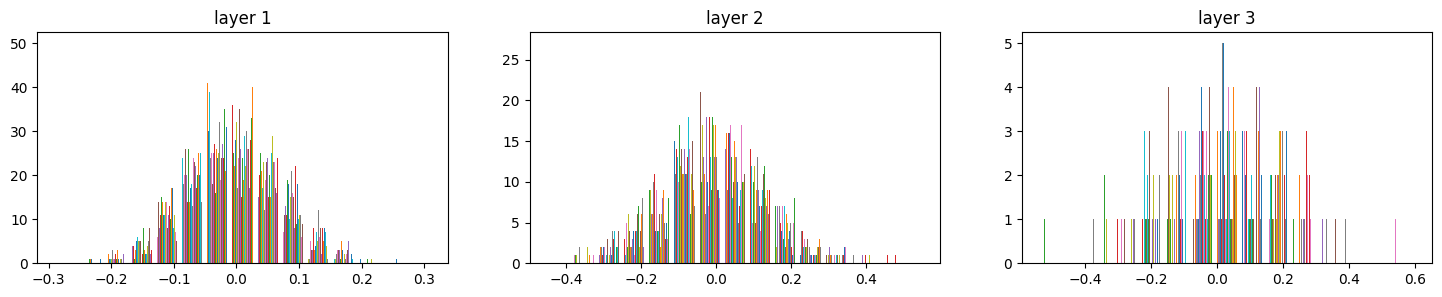

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=len(model.layers), figsize=(6 * len(model.layers), len(model.layers)))

for i, layer in enumerate(model.layers):
    axs[i].hist(layer, bins=15)
    axs[i].set_title(f'layer {i+1}')

plt.show()

#
# Salvando e importando o modelo

In [6]:
model.save('model1')
model2 = MLP.load('model1.pkl')

acc_test = model2.evaluate(y_pred=model.predict(X_test), y_true=y_test)
acc_train = model2.evaluate(y_pred=model.predict(X_train), y_true=y_train)

print('Acc:')
print('     train: ', acc_train)
print('     test:  ', acc_test)

Acc:
     train:  0.94815
     test:   0.9408
